# Linear regression models with Python

In this notebook, we will be studying how to implement a regression model in Python. Firstly, we will be doing it from scratch, to learn and reinforce the concepts. In the future, you will be using a library, like the SciPy, where you can find several models and helper functions already implemented, ready to use. For now, as our objective is to learn and understand how regression models work, we will be using just utilitary libraries, like Pandas, just to perform the heavy lifting of data for us. Let us start with a monovalorate model.

Add some text.

## Linear regression with one variable

The simplest linear regression model we can build is, as you already should know by now, the single variable linear model. Just to recall, a single variable linear model assumes our data behaves like a first-degree function, like this one:

$$ y_i = \theta_0 + \theta_1 x_i $$

In the function, remember, the $\theta$ coefficients are the model's parameters. We observe our data, collecting a series of $(x,y)$ pairs or observations. The variable $x$ is our independent variable, and the variable $y$ is our dependent variable. Our goal will be determining the values of $\theta$ that will give as a function that makes the best guess at how our data behaves, so we can predict future values.

Now, let me show you an example, and after studying it, you will be making your own model! First, let us start a code cell and make some preparations to run our code. This procedure needs to be done only once. All following code cells will have access to any library, variable, function or class you declare previously.

In [ ]:
# This command sets up the plots to be done inline
%matplotlib inline
import numpy as np # Python's numeric and linear algebra lib
import random # Randomization lib
import pandas as pd # Data manipulation and statistical analysis
import matplotlib.pyplot as plt # The versatile plotting lib

With the libraries and pre-configs done, now we need data to work on. There are diverse ways to organize your data. One of the most common formats to store and share is the CSV format. Alongside this notebook, you'll find some csv files you can use to study. Also, the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/index.php) offers a wide range of public datasets you can use.

Let's use the Pandas library to load a file. It offers the function `read_csv`, that does just what we need. First, you have to save the csv files provided in the archive to your Google Drive. Once saved, you can use the function below to mount your drive as a virtual disk, accessible from your notebook. You can also see the files you have in the left panel.

With your drive mounted, you can easily list your contents with the `!ls` command. One tip is to navigate to your desired file using the left panel, them right-click it and use the option "Copy path". Then, just paste it in the `read_csv` function below and let the magic happen. Let's open the `house_prices.csv` file to start our study:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Change the path to your own file, after uploading it to your Google Drive
house_prices = pd.read_csv("/content/drive/My Drive/Classroom/Machine Learning GEAD-VG.ING.EAD.2020 2/Stage 1.2 - Activity 2 - Building Linear Regression models/Chika Higuchi - house_prices.csv")
house_prices

Mounted at /content/drive


,Price,Size,Chambers,Parking space
0,60000,100,2,2
1,60000,95,1,1
2,62500,108,1,2
3,63000,134,1,1
4,69000,124,2,1
5,70000,135,1,1
6,70000,110,1,1
7,72600,128,2,1
8,72600,141,1,1
9,78000,138,2,1


In the cell above, we loaded a file from the Google Drive and loaded it with the function read_csv. Now, we have a beautiful DataFrame with our data! A DataFrame is a data container that organizes and holds our data, making it easy to manipulate and do some calculations as well. The data was displayed as a table, as it is the default manner or visualizing a DataFrame. But Pandas is more flexible than that... Let's plot a chart, showing the Price in function of the house Size as a scatter plot, using Pandas built-in plot function.

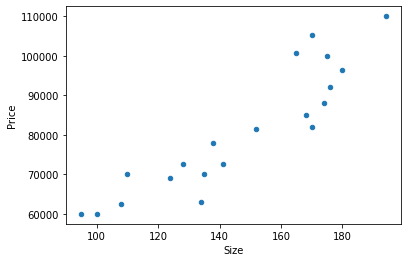

In [ ]:
house_prices.plot(x='Size', y='Price', kind='scatter');

Good! Now we can see more clearly how our data behaves. Now, we want to be ablem to predict a house's price, giving its size. Say, we have a house with a size of 155m² and we want to know how much we should charge to sell it. We can build a linear regression model for that!

We learned that one way to perform a linear regression is solving an optmization problem, where we want to minimize a cost function, that will give us the minimum error between the function we are defining with the $\theta$ parameters and the actual observations we have in our data.

In the guide, we saw the Gradient Descent method, that is one of most used optmization methods. Here, we will be using another method, the [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares), that can also optmize the parameters of a linear function.

### Ordinary Least Squares

The OLS method tries to estimate the relation between the data points and the line given by our linear equation by reducing the error in that relation. Imagine we have data scattered around. The error is the distance of the data points in relation to the line.

![]()

We want the total error, that is, the error considering all data points. It can be given by a sum of the square of the distance of each point:

$$ \epsilon = \sum_{i=1}^{n}{r_i}^2$$

Where $r_i$ is the distance of the point $i$ to the line and $n$ is the total number of points. Then, by estimating the errors, we can determine the best parameters to minimize the relation in what is called the simple linear regression model, where we can find the $\theta_1$ parameter using this relation:

$$ \theta_1 = \frac{Cov[x,y]}{Var[x]} = \frac{\sum_i{(x_i - \bar{x}})(y_i - \bar{y})}{\sum_i{(x_i - \bar{x})^2}} $$

Once we get the $\theta_1$ estimation, it is easy to estimate $\theta_0$:

$$ \theta_0 = \bar{y} - \theta_1\bar{x} $$

The Wikipedia page linked above has a detailed deduction of the formulas. If you like calculus (who doesn't!), it can be an interesting reasoning.

Now, let's compute a model for our house pricing dataset. First, let's extract x and y (size and price) values from the DataFrame. We can easily extract specific columns from a DataFrame, just indexing by their names. Let's inspect the column namess:

In [ ]:
print('Column names: ', house_prices.columns.values)

Column names:  ['Price' 'Size' 'Chambers' 'Parking space']


Now, let's extract the values. We will be extracting the size of each observed house as a vector, like this:

$$ X = [x_1, x_2, ..., x_n] $$

where each $x_i$ represents the size of one observed house. Similarly, we will also have a vector of actual values, that we denote as Y:

$$ Y = [y_1, y_2, ..., y_n] $$

Here as well, each $y_i$ represents a single observation of the price of a house with the corresponding size $x_i$. We use uppercase letters to denote vectors or matrices and lowercase to denote individual values.

In [ ]:
X = house_prices["Size"].values
Y = house_prices["Price"].values

print('Dimensions of X: ', X.shape)
print('Dimensions of Y: ', Y.shape)

Dimensions of X:  (20,)
Dimensions of Y:  (20,)


Note the shape, indicating both values are one-dimensional vectors.

Now, let's use the Numpy mean function to calculate the means and the len function to retrieve the number of items:

In [ ]:
x_mean = X.mean()
x_std = X.std()
y_mean = Y.mean()
n = len(X)

Now, let's calculate $Cov[x,y]$ and $Var[x]$:

In [ ]:
# Remember that X and Y are vectors.
# Numpy makes easy to operate with vectors
# and matrices.
cov_xy = np.sum((X - x_mean) * (Y - y_mean))
var_x = np.sum((X-x_mean)**2)

# The round function does not affect
# the variable original value.
print('cov_xy: ', round(cov_xy, 2))
print('var_x: ', round(var_x, 2))


cov_xy:  8020490.0
var_x:  16622.55


Now, it is just apply the relationship and estimate the parameters:

In [ ]:
theta_1 = cov_xy / var_x
theta_0 = y_mean - theta_1 * x_mean
print(f'theta_0: {theta_0}')
print(f'theta_1: {theta_1}')

theta_0: 10073.906530586493
theta_1: 482.5065949568506


And that's it! We built our linear model using the OLS method. Now, to predict the price of our house with 155 m² of size, we just plug the values in the formula:

In [ ]:
x_new = 155
y_new = theta_0 + theta_1 * x_new
print(f'Price for a {x_new} m² house: $ {round(y_new,2)}')

Price for a 155 m² house: $ 84862.43


Let's plot our estimated linear model on the top of our data, so we can see the relationship better:

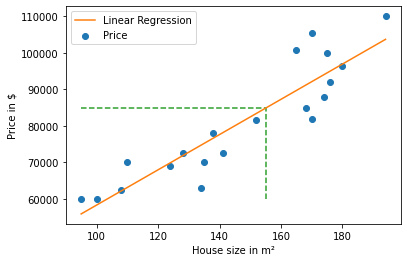

In [ ]:
# Here we are picking the colormap in use
# to be able to choose colors more easily
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Calculating line values of x and y.
# First, let's take the minimum and maximum
# values of x and the min of y to format the
# plotting area.
x_min = np.min(X)
x_max = np.max(X)
y_min = np.min(Y)

# Now we generate a interval between the
# min and max values of x, with 1000 points
x = np.linspace(x_min, x_max, 1000)
y = theta_0 + theta_1 * x

# Starting the figure
plt.figure()

# Plotting the line corresponding to our model
plt.plot(x, y, color=cycle[1], label='Linear Regression')

# Plotting the observations in our dataset
plt.scatter(X, Y, label='Price')

# Now adding lines showing our predicted
# price for a house with 155 m²
plt.vlines(x_new, y_min, y_new, color=cycle[2], linestyle="dashed")
plt.hlines(y_new, x_min, x_new, color=cycle[2], linestyle="dashed")

# x-axis label
plt.xlabel('House size in m²')

# y-axis label
plt.ylabel('Price in $')

# Turning on the legend
plt.legend()

# Showing the plot
plt.show()

Seems good, doesn't it? But in Math, appearances have no place, we have to demonstrate what we want to convey. So, we need means to calculate how good our approximation is. There are many methods one can use, let's try two of them: the *Root Mean Squared Error* (RMSE) and the *Coefficient of Determination* (R²).

Let's try the RMSE first. It is given by this formula:

$$ RMSE = \sqrt{\frac{1}{n}\sum_{j=1}^{n}{(y_j-\hat{y}_j)^2}} $$

In this formula, $\hat{y}_j$ is the j-th predicted value. In other words, we just take an $x$ value from our observations and calculate the predictions using the parameters we found. Then, we plug this estimation with the corresponding observed $y$ value in the RMSE formula. Let's do this.

In [ ]:
# Let's generate a vector with
# the predicted values, according
# to our model
Y_pred = theta_0 + theta_1 * X

# Now, let's calculate the RMSE
# in two steps, first the summation
rmse = np.sum((Y - Y_pred)**2)

# And second, the mean and the square root
rmse = np.sqrt(rmse/n)

print('RMSE: ', round(rmse, 2))

RMSE:  6400.48


Now, let's find the R² score of our model, which is given by the formula below:

$$ R^2 = 1 - \frac{SSR}{SST} = 1 -\frac{\sum{(y_i-\hat{y})^2}}{\sum{(y_i - \bar{y})^2}} $$

Here, SSR is the total sum of square residuals and SST is the total sum of squares. The residuals are given by the difference between the observed values and the predicted values and the total sum of squares are the difference between the observed values and its mean. Let's see how good our model did:

In [ ]:
# Let's calculate the SSR first
ssr = np.sum((Y - Y_pred)**2)

# And now the SST
sst = np.sum((Y - y_mean)**2)

# Now, we can find the R² score
r2  = 1 - (ssr/sst)
print('R² score: ', round(r2, 3))

R² score:  0.825


The R² score usually ranges from 0 to 1, with 1 being a perfect match (the predicted values are equal to the observed values). It can also become negative, if the model is completely wrong. Our model gets a score value of 0.825, so not bad. We could try to improve our model by getting more data points, improving features or fitting more models.

### Gradient Descent

Let's now see how to implement the Gradient Descent method for the univariate linear regression. Firstly, let's remember how to formulate the problem. In the GD we are minimizing the cost function $J(\theta)$, that is the squared error between an observed value $y_i$ and its prediction (or hypothesis) $h_\theta(x)$:

$$ J(\theta) = \frac{1}{2n}\sum_{j=1}^{n}(h_\theta(x_j) - y_j)^2 $$

To perform the GD, we take an initial guess for the values of $\theta$ and then update the values using the partial derivative of the cost function:

$$ \theta_0 = \theta_0 - \alpha[\frac{1}{n}\sum_{j=1}^{n}{h_\theta(x_j) - y_j)]} $$

$$ \theta_1 = \theta_1 - \alpha[\frac{1}{n}\sum_{j=1}^{n}{(h_\theta(x_j) - y_j)x_{i,j}]} $$

Where $\alpha$ is the learning rate. We repeat this update for each $\theta$ parameter **simultaneously** until convergence. Let's now see how it works in Python.

Let's start by defining a function to calculate the cost function $J(\theta)$, given X, Y and $theta$, also as a vector:

In [ ]:
# Let's define a function for the cost function, so we can store its progress to
# visualize if the GD is working properly.
def cost_function(X, Y, theta):
  n = len(X)
  J = 1/(2*n) * np.sum((theta[0] + theta[1] * X - Y) ** 2)
  return J

Now, we read X and Y vectors from our database again, just to guarantee that we are using the correct values. We save the number of observations in the variable *n*. We must also guess a initial value for $\theta_0$ and $\theta_1$, for example (0,0). Let's put them into an array, to facilitate the operations.

We will also apply mean normalization to the X vector, so the GD will converge faster. Just to remember, mean normalization is applyied according to this formula:

$$ x_{normalized} = \frac{x - \mu[x]}{\sigma[x]} $$

Where $\mu[x]$ is the mean and $\sigma[x]$ is the standard deviation of the X values. We must save these values, because the gradient will be affected by this normalization, so we need to apply the same scaling to new data when we are doing predictions.

In [ ]:
# Reading x values from the dataset.
X = house_prices["Size"].values

# Let's apply feature scaling and mean normalization, to help the
# Gradient descent to converge faster.
x_mean = X.mean()
x_std = X.std()
X = (X - x_mean)/x_std

# Reading y values from the dataset.
Y = house_prices["Price"].values

# Determining the number of observations.
n = len(X)

# Theta values insida an array.
theta = np.array([0,0])

Now, we determine the hyperparameters for the GD algorithm. The version we'll be using is the Batch Gradient Descent. In this version, we calculate the total error for all the samples in the training set before updating the values of $\theta$. Thus, we can take advantage of the Numpy's vectorized operations.

We have to define the learning rate $\alpha$ and a convergence criterion. We can use the difference between the cost function and the squared error as our convergence criterion. If it is lesser than a estipulated value, we consider that the result is sufficiently close to the global minimum to stop the iterations. Let's call this value $\eta$. We can also determine a max number of iterations to stop the algorithm, if we still have not reached convergence.

In [ ]:
# Let's first declare the learning rate.
alpha = 0.01

# Convergence criteria. We stop the algorithm if the difference between the cost and squared
# error is smaller than eta or we reach the maximum number of iterations.
eta = 0.001
max_iter = 10000

Now, we define the BGD function, that will receive the X, Y, and $\theta$ vectors, as well as the hyperparameters.

In [ ]:
# Batch Gradient Descente function.
def BGD(X, Y, theta, alpha=0.01, eta=0.001, max_iter=10000):
  # First iteration
  i = 0
  # Initializing the convergence criterion to the actual
  # error.
  eta_i = np.inf
  # Let's store the progress, so we can visualize it later.
  cost_history = []
  while eta_i >= eta and i < max_iter:
    # Let's start calculating the predictions for the actual
    # values of theta
    Y_pred = theta[0] + theta[1]*X
    # Now, we calculate the loss, that is, the difference between predicted and
    # actual values, which is what we want to minimize.
    loss = Y_pred - Y
    # Calculating the gradient for each theta.
    grad_0 = 1/n * np.sum((theta[0] + theta[1] * X) - Y) # Gradient for theta_0
    grad_1 = 1/n * np.sum(X*((theta[0] + theta[1] * X) - Y)) # Gradient for theta_1
    # Changing Values of theta using the gradients
    theta[0] = theta[0] - alpha * grad_0
    theta[1] = theta[1] - alpha * grad_1
    # New Cost Value
    cost = cost_function(X, Y, theta)
    cost_history.append(cost)
    eta_i = cost_history[i-1] - cost_history[i] if i > 0 else eta_i
    i += 1
  return (theta, cost_history)

Now, we can run the BGD function and get the values for $\theta$:

theta_0: 80831
theta_1: 13811


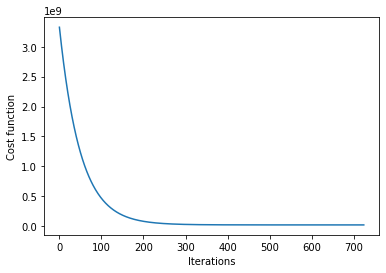

In [ ]:
theta, cost_history = BGD(X, Y, theta, alpha, eta, max_iter)

print(f'theta_0: {theta[0]}')
print(f'theta_1: {theta[1]}')

# Let's plot our cost history to see the GD progress and to see
# if it is working properly.
plt.plot(range(len(cost_history)),cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.show()

Now, let's plot again the points and our prediction. Remember, as we scaled our data in the prediction, we have to scale our predictions the same way, so remember to save the mean and the standard deviation used in the GD.

Price for a 155.0 m² house: $ 84735.35


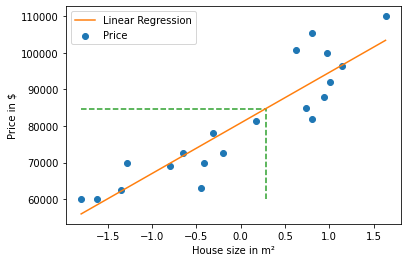

In [ ]:
# Here we are picking the colormap in use
# to be able to choose colors more easily
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Reading and scaling the X values.
X = house_prices.Size.values
x_mean = X.mean()
x_std = X.std()
X = (X - x_mean)/x_std
Y = house_prices.Price.values

# Calculating line values of x and y.
# First, let's take the minimum and maximum
# values of x and the min of y to format the
# plottint area.
x_min = np.min(X)
x_max = np.max(X)
y_min = np.min(Y)

# Now we generate a interval between the
# min and max values of x, with 1000 points
x = np.linspace(x_min, x_max, 1000)
y = theta[0] + theta[1] * x

# Starting the figure
plt.figure()

# Plotting the line corresponding to our model
plt.plot(x, y, color=cycle[1], label='Linear Regression')

# Plotting the observations in our dataset
plt.scatter(X, Y, label='Price')

# Now adding lines showing our predicted
# price for a house with 155 m², but now
# scaling it the same as in the training.
x_new = (155 - x_mean)/x_std
y_new = theta[0] + theta[1] * x_new
print(f'Price for a {x_new * x_std + x_mean} m² house: $ {round(y_new,2)}')

plt.vlines(x_new, y_min, y_new, color=cycle[2], linestyle="dashed")
plt.hlines(y_new, x_min, x_new, color=cycle[2], linestyle="dashed")

# x-axis label
plt.xlabel('House size in m²')

# y-axis label
plt.ylabel('Price in $')

# Turning on the legend
plt.legend()

# Showing the plot
plt.show()

## Multivariate Linear Regression

As we already know, in the multivariate linear regression we have multiple independent variables, instead of just one. Let's imagine a case where whe have two variables, $x_1$ and $x_2$. The hypothesis function for this problem will be:

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$

Now, as we have many variables for each observation, the $X$ vector becomes now a $n\times m$ matrix, with $n$ lines for each observation and $m$ columns, for each independent variable (2, in this case). It will look like this:

$$ X =
\begin{bmatrix}
x_{0,1} & x_{0,2} \\
x_{1,1} & x_{1,2} \\
\vdots & \vdots \\
x_{n,1} & x_{n,2}
\end{bmatrix}
$$

Similarly, the $\theta$ parameters will now increase to $m + 1$, one for each variable plus the bias factor ($\theta_0$). So, the $\theta$ vector becomes like this for our case with $m=2$:

$$ \theta =
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\end{bmatrix}
$$

Now the things will start to get interesting. Do you remember how matrix multiplication works? If we are multiplying $M\cdot N$, where $M$ and $N$ are matrices, we take each line of $M$ and multiply it element-wise by each column of $N$, then sum the results, with the restriction that if $M$ has $m\times n$ dimensions, the multiplication is possible if, and only if, $N$ has $n \times k$ dimensions and the resulting matrix will have $m\times k$ dimensions.

Now, look again at the $X$ matrix and the $\theta$ vector. What happens if we try to multiply them? It will fail, because $X$ dimension is $n\times 2$ and $\theta$ is $3\times 1$.

Now, look at hypothesis equation again, particularly at the $\theta_0$ parameter. It does not have a companion $x$ like the other parameters. Except it has! There is a "virtual" $x_0$ variable there, with value equal to 1. Note that multiplying $\theta_0$ by 1, does not alter its value, so we continue to add $\theta_0$'s value. That's why the "$x_0$" parameter is omitted. Therefore, we can apply a little trick to be able to perform the $X\cdot \theta$ multiplication. We just add a column for $x_0$, with 1 for all the lines:

$$ X =
\begin{bmatrix}
1 & x_{0,1} & x_{0,2} \\
1 & x_{1,1} & x_{1,2} \\
1 & x_{...,1} & x_{...,2} \\
1 & x_{n,1} & x_{n,2}
\end{bmatrix}
$$

Now, $X$ dimension becomes $n\times 3$ and we can multiply it by $\theta$, that is $3\times 1$. Let's now multiply them and see what is the result:

$$
\begin{bmatrix}
1 & x_{0,1} & x_{0,2} \\
1 & x_{1,1} & x_{1,2} \\
1 & x_{\dots,1} & x_{...,2} \\
1 & x_{n,1} & x_{n,2}
\end{bmatrix} \cdot
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2
\end{bmatrix} =
\begin{bmatrix}
1\theta_0 + \theta_1 x_{0,1} + \theta_2 x_{0,2}\\
1\theta_0 + \theta_1 x_{1,1} + \theta_2 x_{0,2}\\
1\theta_0 + \theta_1 x_{\dots,1} + \theta_2 x_{\dots,2}\\
1\theta_0 + \theta_1 x_{n,1} + \theta_2 x_{n,2}\\
\end{bmatrix}
$$

Look at the resulting vector. Looks familiar? Yes, you guessed correctly. Each line has the hypothesis function for each observation! So, the result of multiplying the $X$ matrix with the $\theta$ vector is the $\hat{Y}$ vector, with the predictions for each observation. We use the 'hat' to denote that $\hat{Y}$ is the prediction vector, calculated from the $X$ observations and the $\theta$ parameters, while the $Y$ vector is the real values collected in the dataset. Neat!

Imagine if we had an operation that takes a matrix and a vector, and outputs a vector with the sum of the product of each matrix line by each vector element... We could calculate all observations at once! Imagine no more, just remember the definition of the dot product of two n-dimensional vectors:

$$ \vec{a} \cdot \vec{b} = \sum_{i=1}^n{(a_i \times b_i)}$$

If we consider each line of the $X$ matrix as a vector, then we just have to calculate a dot product between $X$ and $\theta$ to have a prediction vector. Fortunately, Numpy has a dot operation! Let's see how it works.

Let's load $X$ with the first five lines of our dataset and exclude the first column, that is the Price ($Y$ values). Using Pandas, it is as simple as it gets.

In [ ]:
X = house_prices.head().loc[:,'Size':].values
print('X before concatenating:\n', X)

X before concatenating:
 [[100   2   2]
 [ 95   1   1]
 [108   1   2]
 [134   1   1]
 [124   2   1]]


Now, we have to append the $x_0$ column. We can use Numpy's `.c_` class, that is a alias for the concatenate function. We generate a vector of ones, with the same length of X and concatenate it.

In [ ]:
X = np.hstack([np.ones((len(X),1)), X])
print('X after concatenating:\n',X)

X after concatenating:
 [[  1. 100.   2.   2.]
 [  1.  95.   1.   1.]
 [  1. 108.   1.   2.]
 [  1. 134.   1.   1.]
 [  1. 124.   2.   1.]]


Now, let's define a $\theta$ vector, with all values equal to 2, just to demonstrate the dot operation. It'll have for values, one for each variable plus $\theta_0$.

In [ ]:
theta = np.full((4,1), 2)
print('theta: \n',theta)

theta: 
 [[2]
 [2]
 [2]
 [2]]


Now, let's calculate the predictions for these values of $\theta$ using the dot product. There are two ways of doing it. This way:

In [ ]:
Y_pred =  np.dot(X, theta)
print('Predictions: \n', Y_pred)

Predictions: 
 [[210.]
 [196.]
 [224.]
 [274.]
 [256.]]


Or this way:

In [ ]:
Y_pred = X.dot(theta)
print('Predicions: \n', Y_pred)

Predicions: 
 [[210.]
 [196.]
 [224.]
 [274.]
 [256.]]


Now you can substitute the vector operations with matrix operations to apply the algorithms to the multivariate case. Note that Numpy represents vectors as line vectors, instead of column vectors, but that is just a convention that does not affects the calculation.

# Exercise

##1. Multivariate model for house prices

Fun time! Now it is your time to have some fun with this data! Read the Section 2.2 of your Study Guide and try to build a multivariate linear model, to predict house prices not only by its size, by also by their number of chambers and parking space. Remember to apply data scaling to adjust the range of your observations, as well as determining the R² score and the RMSE for your model. You can extend this notebook to perform your calculations.

In [ ]:
# Start your exercise here. You can add as many cells as needed.
# This command sets up the plots to be done inline
%matplotlib inline
import numpy as np # Python's numeric and linear algebra lib
import random # Randomization lib
import pandas as pd # Data manipulation and statistical analysis
import matplotlib.pyplot as plt # The versatile plotting lib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Change the path to your own file, after uploading it to your Google Drive
house_prices = pd.read_csv("/content/drive/My Drive/Classroom/Machine Learning GEN-VG.ING.2021 2/Marvellous Solomon - house_prices.csv")
house_prices

Mounted at /content/drive


,Price,Size,Chambers,Parking space
0,60000,100,2,2
1,60000,95,1,1
2,62500,108,1,2
3,63000,134,1,1
4,69000,124,2,1
5,70000,135,1,1
6,70000,110,1,1
7,72600,128,2,1
8,72600,141,1,1
9,78000,138,2,1


In [ ]:
X = house_prices["Size"].values
Y = house_prices["Price"].values
D = house_prices["Chambers"].values
E = house_prices["Parking space"].values

print('Dimensions of X: ', X.shape)
print('Dimensions of Y: ', Y.shape)
print('Dimensions of D: ', D.shape)
print('Dimensions of E: ', E.shape)

Dimensions of X:  (20,)
Dimensions of Y:  (20,)
Dimensions of D:  (20,)
Dimensions of E:  (20,)


In [ ]:
# Let's define a function for the cost function, so we can store its progress to
# visualize if the GD is working properly.
def cost_function(X, Y, D, E, theta):
  n = len(X)
  J = 1/(2*n) * np.sum((theta[0] + theta[1] * X + theta[2] * D + theta[3] * E - Y) ** 2)
  return J

In [ ]:
# Reading x values from the dataset.
X = house_prices["Size"].values
D = house_prices["Chambers"].values
E = house_prices["Parking space"].values

# Let's apply feature scaling and mean normalization, to help the
# Gradient descent to converge faster.
x_mean = X.mean()
x_std = X.std()
X = (X - x_mean)/x_std

d_mean = D.mean()
d_std = D.std()
D = (D - d_mean)/d_std

e_mean = E.mean()
e_std = E.std()
E = (E - e_mean)/e_std
# Reading y values from the dataset.
Y = house_prices["Price"].values

# Determining the number of observations.
n = len(X)

# Theta values insida an array.
theta = np.array([0,0,0,0])

In [ ]:
# Let's first declare the learning rate.
alpha = 0.01

# Convergence criteria. We stop the algorithm if the difference between the cost and squared
# error is smaller than eta or we reach the maximum number of iterations.
eta = 0.001
max_iter = 10000

In [ ]:
# Batch Gradient Descent function.
def BGD(X, Y, D, E, theta, alpha=0.01, eta=0.001, max_iter=10000):
  # First iteration
  i = 0
  # Initializing the convergence criterion to the actual
  # error.
  eta_i = np.inf
  # Let's store the progress, so we can visualize it later.
  cost_history = []
  while eta_i >= eta and i < max_iter:
    # Let's start calculating the predictions for the actual
    # values of theta
    Y_pred = theta[0] + theta[1]*X + theta[2]*D + theta[3]*E
    # Now, we calculate the loss, that is, the difference between predicted and
    # actual values, which is what we want to minimize.
    loss = Y_pred - Y
    # Calculating the gradient for each theta.
    grad_0 = 1/n * np.sum(loss) # Gradient for theta_0
    grad_1 = 1/n * np.sum(X*loss) # Gradient for theta_1
    grad_2 = 1/n * np.sum(D*loss) # Gradient for theta_2
    grad_3 = 1/n * np.sum(E*loss) # Gradient for theta_3
    # Changing Values of theta using the gradients
    theta[0] = theta[0] - alpha * grad_0
    theta[1] = theta[1] - alpha * grad_1
    theta[2] = theta[2] - alpha * grad_2
    theta[3] = theta[3] - alpha * grad_3
    # New Cost Value
    cost = cost_function(X, Y, D, E, theta)
    cost_history.append(cost)
    eta_i = cost_history[i-1] - cost_history[i] if i > 0 else eta_i
    i += 1
  return (theta, cost_history)

theta_0: 80831
theta_1: 13211
theta_2: 1606
theta_3: -2237


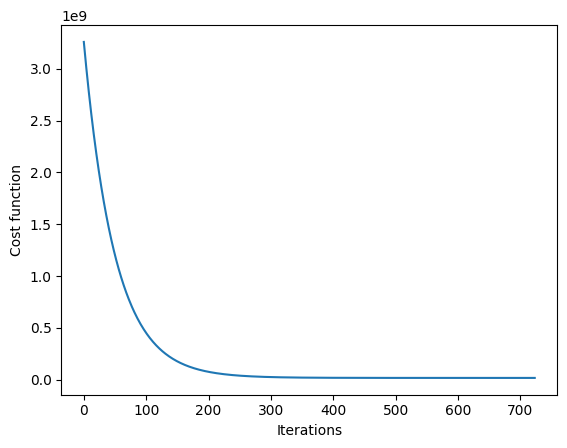

In [ ]:
theta, cost_history = BGD(X, Y, D, E, theta, alpha, eta, max_iter)

print(f'theta_0: {theta[0]}')
print(f'theta_1: {theta[1]}')
print(f'theta_2: {theta[2]}')
print(f'theta_3: {theta[3]}')

# Let's plot our cost history to see the GD progress and to see
# if it is working properly.
plt.plot(range(len(cost_history)),cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.show()

In [ ]:
Y_pred = theta[0] + theta[1]*X + theta[2]*D + theta[3]*E
print('Predictions: \n', Y_pred)

Predictions: 
 [ 56347.11708785  56765.72270951  57556.83417146  74637.44772149
  72511.23191932  75095.69708077  63639.46309873  74344.22935644
  77845.19323646  78926.72294926  85342.2139792   85968.29444692
  89964.35130964  92967.42209276  91174.06839325 100629.47382973
  95881.94924268  91299.45564986  93590.70244627 102132.40927839]


In [ ]:
# Now, let's calculate the RMSE
# in two steps, first the summation
rmse = np.sum((Y - Y_pred)**2)

# And second, the mean and the square root
rmse = np.sqrt(rmse/n)

print('RMSE: ', round(rmse, 2))

RMSE:  5901.57


In [ ]:
# Let's calculate the SSR first
ssr = np.sum((Y - Y_pred)**2)

# And now the SST
y_mean = Y.mean()
sst = np.sum((Y - y_mean)**2)

# Now, we can find the R² score
r2  = 1 - (ssr/sst)
print('R² score: ', round(r2, 3))

R² score:  0.851


##2. Bicycle sharing data

Alongside this notebook, you'll find the `bike_sharing.csv` file. This dataset contains observations of usage of bike sharing services all over the world inclunding date information as the day of use, which month, which weekday, etc, and also weather information, as the current season, temperature, humidity, etc. A complete description of the dataset can be found [here](http://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).

a. Build two models, one to predict the usage in function of the temperature and other in function of the feeling temperature. Compare the parameters found for each model using the OLS to see how they differ. Calculate the RMSE and the R² to see wich one is more reliable.

b. Build a multivariate model to predict the usage in function of the temperature, humidity and windspeed. Calculate the RMSE and the R² score.

In [ ]:
# Start your exercise here. You can add as many cells as needed.
# This command sets up the plots to be done inline
%matplotlib inline
import numpy as np # Python's numeric and linear algebra lib
import random # Randomization lib
import pandas as pd # Data manipulation and statistical analysis
import matplotlib.pyplot as plt # The versatile plotting lib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Change the path to your own file, after uploading it to your Google Drive
bike_sharing = pd.read_csv("/content/drive/My Drive/Classroom/Machine Learning GEN-VG.ING.2021 2/Marvellous Solomon - bike_sharing.csv")
bike_sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
A = bike_sharing["temp"].values
B = bike_sharing["cnt"].values

print('Dimensions of A: ', A.shape)
print('Dimensions of B: ', B.shape)

Dimensions of A:  (731,)
Dimensions of B:  (731,)


In [ ]:
x_mean = A.mean()
x_std = A.std()
y_mean = B.mean()
n = len(A)

In [ ]:
# Numpy makes easy to operate with vectors
# and matrices.
cov_xy = np.sum((A - x_mean) * (B - y_mean))
var_x = np.sum((A-x_mean)**2)

# The round function does not affect
# the variable original value.
print('cov_xy: ', round(cov_xy, 2))
print('var_x: ', round(var_x, 2))


cov_xy:  162435.73
var_x:  24.46


In [ ]:
theta_1 = cov_xy / var_x
theta_0 = y_mean - theta_1 * x_mean
print(f'theta_0: {theta_0}')
print(f'theta_1: {theta_1}')

theta_0: 1214.6421190294018
theta_1: 6640.709998548637


In [ ]:
# Let's generate a vector with
# the predicted values, according
# to our model
B_pred = theta_0 + theta_1 * A

# Now, let's calculate the RMSE
# in two steps, first the summation
rmse = np.sum((B - B_pred)**2)

# And second, the mean and the square root
rmse = np.sqrt(rmse/n)

print('RMSE: ', round(rmse, 2))

RMSE:  1507.32


In [ ]:
# Let's calculate the SSR first
ssr = np.sum((B - B_pred)**2)

# And now the SST
sst = np.sum((B - y_mean)**2)

# Now, we can find the R² score
r2  = 1 - (ssr/sst)
print('R² score: ', round(r2, 3))

R² score:  0.394


In [ ]:
C = bike_sharing["atemp"].values

In [ ]:
x_mean = C.mean()
x_std = C.std()

In [ ]:
# Numpy makes easy to operate with vectors
# and matrices.
cov_xy = np.sum((C - x_mean) * (B - y_mean))
var_x = np.sum((C-x_mean)**2)

# The round function does not affect
# the variable original value.
print('cov_xy: ', round(cov_xy, 2))
print('var_x: ', round(var_x, 2))

cov_xy:  145431.55
var_x:  19.39


In [ ]:
theta_1 = cov_xy / var_x
theta_0 = y_mean - theta_1 * x_mean
print(f'theta_0: {theta_0}')
print(f'theta_1: {theta_1}')

theta_0: 945.823981098491
theta_1: 7501.833949516507


In [ ]:
# Let's generate a vector with
# the predicted values, according
# to our model
B_pred = theta_0 + theta_1 * C

# Now, let's calculate the RMSE
# in two steps, first the summation
rmse = np.sum((B - B_pred)**2)

# And second, the mean and the square root
rmse = np.sqrt(rmse/n)

print('RMSE: ', round(rmse, 2))

RMSE:  1501.72


In [ ]:
# Let's calculate the SSR first
ssr = np.sum((B - B_pred)**2)

# And now the SST
sst = np.sum((B - y_mean)**2)

# Now, we can find the R² score
r2  = 1 - (ssr/sst)
print('R² score: ', round(r2, 3))

R² score:  0.398


In [ ]:
A = bike_sharing["temp"].values
B = bike_sharing["cnt"].values
F = bike_sharing["hum"].values
G = bike_sharing["windspeed"].values

In [ ]:
# Let's define a function for the cost function, so we can store its progress to
# visualize if the GD is working properly.
def cost_function(A, B, F, G, theta):
  n = len(A)
  J = 1/(2*n) * np.sum((theta[0] + theta[1] * A + theta[2] * F + theta[3] * G - B) ** 2)
  return J

In [ ]:
# Let's apply feature scaling and mean normalization, to help the
# Gradient descent to converge faster.
x_mean = A.mean()
x_std = A.std()
A = (A - x_mean)/x_std

x_mean = F.mean()
x_std = F.std()
F = (F - x_mean)/x_std

x_mean = G.mean()
x_std = G.std()
G = (G - x_mean)/x_std
# Reading y values from the dataset.
B = bike_sharing["cnt"].values

# Determining the number of observations.
n = len(A)

# Theta values insida an array.
theta = np.array([0,0,0,0])

In [ ]:
# Let's first declare the learning rate.
alpha = 0.01

# Convergence criteria. We stop the algorithm if the difference between the cost and squared
# error is smaller than eta or we reach the maximum number of iterations.
eta = 0.001
max_iter = 10000

In [ ]:
# Batch Gradient Descente function.
def BGD(A, B, F, G, theta, alpha=0.01, eta=0.001, max_iter=10000):
  # First iteration
  i = 0
  # Initializing the convergence criterion to the actual
  # error.
  eta_i = np.inf
  # Let's store the progress, so we can visualize it later.
  cost_history = []
  while eta_i >= eta and i < max_iter:
    # Let's start calculating the predictions for the actual
    # values of theta
    B_pred = theta[0] + theta[1]*A + theta[2]*F + theta[3]*G
    # Now, we calculate the loss, that is, the difference between predicted and
    # actual values, which is what we want to minimize.
    loss = B_pred - B
    # Calculating the gradient for each theta.
    grad_0 = 1/n * np.sum(loss) # Gradient for theta_0
    grad_1 = 1/n * np.sum(A*loss) # Gradient for theta_1
    grad_2 = 1/n * np.sum(F*loss) # Gradient for theta_2
    grad_3 = 1/n * np.sum(G*loss) # Gradient for theta_3
    # Changing Values of theta using the gradients
    theta[0] = theta[0] - alpha * grad_0
    theta[1] = theta[1] - alpha * grad_1
    theta[2] = theta[2] - alpha * grad_2
    theta[3] = theta[3] - alpha * grad_3
    # New Cost Value
    cost = cost_function(A, B, F, G, theta)
    cost_history.append(cost)
    eta_i = cost_history[i-1] - cost_history[i] if i > 0 else eta_i
    i += 1
  return (theta, cost_history)

theta_0: 4405
theta_1: 1112
theta_2: -302
theta_3: -263


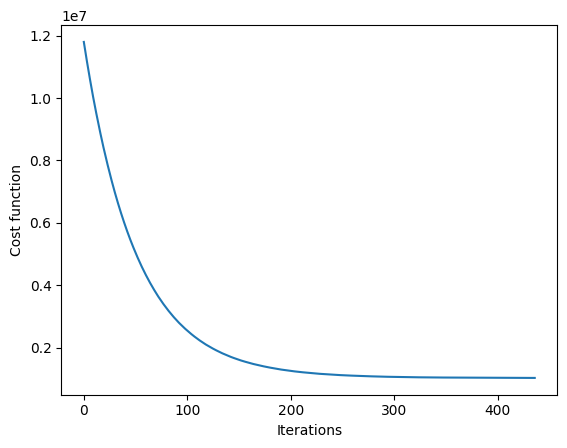

In [ ]:
theta, cost_history = BGD(A, B, F, G, theta, alpha, eta, max_iter)

print(f'theta_0: {theta[0]}')
print(f'theta_1: {theta[1]}')
print(f'theta_2: {theta[2]}')
print(f'theta_3: {theta[3]}')

# Let's plot our cost history to see the GD progress and to see
# if it is working properly.
plt.plot(range(len(cost_history)),cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.show()

In [ ]:
B_pred = theta[0] + theta[1]*A + theta[2]*F + theta[3]*G
print('Predictions: \n', B_pred)

Predictions: 
 [3210.21548098 3261.30531162 2795.35837198 2791.37068269 3190.54559944
 3211.14053995 2936.25231733 2332.76409277 2063.2591456  2506.77091169
 2529.53679846 2116.10624934 2355.43566681 2779.73369338 3196.46145218
 3114.68590465 2642.2626402  2363.10427264 2867.57835388 3155.86923986
 2282.30291562 2299.4501643  2195.81727703 2383.70568937 2981.39514904
 1866.93900212 2712.79597482 2508.25578309 2690.85804555 2905.40023946
 2555.26536245 2600.05956498 2410.39195438 2637.012745   2981.38177438
 2272.61864458 3422.85476261 3303.37608204 2344.636834   2500.94240691
 2568.46951994 3079.1650997  2880.05155034 3440.40782176 3678.8512959
 3333.77799453 3553.81204125 4169.20312216 4547.97936617 3677.19843237
 3483.12425688 2887.55005307 2589.9814316  3503.4497608  2839.580403
 2899.65594254 3315.08962154 3592.55135525 3005.28733404 3123.64745987
 3409.86150213 3136.29135557 2977.64826866 3178.26013355 2483.77439616
 2634.84863903 3848.17416602 2778.17869407 4848.67150474 3127.443

In [ ]:
# Now, let's calculate the RMSE
# in two steps, first the summation
rmse = np.sum((B - B_pred)**2)

# And second, the mean and the square root
rmse = np.sqrt(rmse/n)

print('RMSE: ', round(rmse, 2))

RMSE:  1436.64


In [ ]:
# Let's calculate the SSR first
ssr = np.sum((B - B_pred)**2)

# And now the SST
b_mean = B.mean()
sst = np.sum((B - b_mean)**2)

# Now, we can find the R² score
r2  = 1 - (ssr/sst)
print('R² score: ', round(r2, 3))

R² score:  0.449
